In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Testing gibbs sampling with conjugate prior.

In [2]:
from qmmc import Value, Function
from qmmc import Normal, InvGamma
from qmmc import Model, NormalConjugateSampler

## First sample a dataset.

In [3]:
mu_0, sigma_0 = Value(0), Value(2)
shape_0, scale_0 = Value(3), Value(5)

mu_real = Normal(mu_0, sigma_0, name='mu_real')
sigma_real = InvGamma(shape_0, scale_0, name='sigma_real')
X_real = Normal(mu_real, sigma_real, name='X_real', size=1000)

## Recreate the same model graph for the estimation

In [4]:
mu = Normal(mu_0, sigma_0, name='mu')
sigma = InvGamma(shape_0, scale_0, name='sigma')
X = Normal(mu, sigma, name='X', value=X_real.value, observed=True)

## Estimate

In [5]:
param_sampler = NormalConjugateSampler(mu, sigma)
model = Model(variables=[mu, sigma, X], samplers=[param_sampler])

In [6]:
model.estimate(1000)

0% 1% 2% 3% 4% 5% 6% 7% 8% 9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 28% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 56% 57% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99% 100%


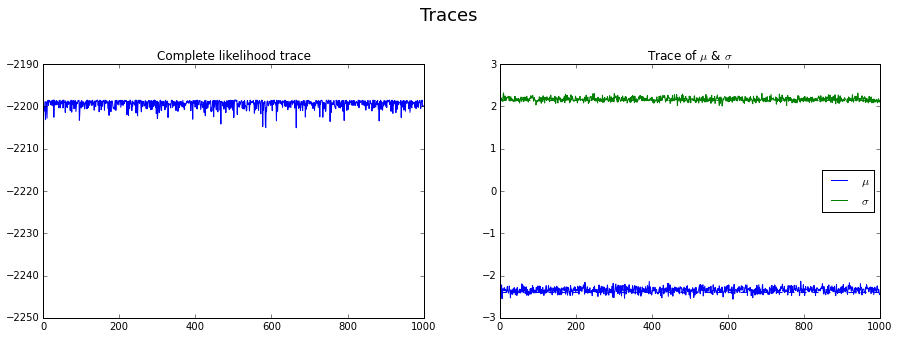

In [7]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(model.logp_history)
plt.title("Complete likelihood trace")

plt.subplot(2, 2, 2)
plt.plot(param_sampler.history['mu'])
plt.plot(param_sampler.history['sigma'])
plt.axhline(mu_real.value, linestyle='--')
plt.axhline(sigma_real.value, color='g', linestyle='--')
plt.legend([r"$\mu$", r"$\sigma$"], loc='best')
plt.title(r"Trace of $\mu$ & $\sigma$")

plt.suptitle(r"Traces", size=18)
plt.show()